# 라이브러리 불러오기

In [516]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import catboost

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

In [572]:
train = pd.read_csv(r'C:\Users\kwctl\Desktop\CreditCard\Ubion-CreditCardUserPrediction\Data\train.csv')
test = pd.read_csv(r'C:\Users\kwctl\Desktop\CreditCard\Ubion-CreditCardUserPrediction\Data\test.csv')
submission = pd.read_csv(r'C:\Users\kwctl\Desktop\CreditCard\Ubion-CreditCardUserPrediction\Data\sample_submission.csv')

# Feature 설명

## index   



## gender: 성별   (o)



## car: 차량 소유 여부   (o)



## reality: 부동산 소유 여부   (o)



## child_num: 자녀 수   


## income_total: 연간 소득  (o)



## income_type: 소득 분류   
## ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']   



## edu_type: 교육 수준   
## ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']   



## family_type: 결혼 여부   
## ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']   



## house_type: 생활 방식   
## ['Municipal apartment', 'House / apartment', 'With parents','Co-op apartment', 'Rented apartment', 'Office apartment']   



## DAYS_BIRTH: 출생일   (o)
## 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미   



## DAYS_EMPLOYED: 업무 시작일   (o)   
## 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미,양수 값은 고용되지 않은 상태를 의미함   



## FLAG_MOBIL: 핸드폰 소유 여부  (o) 



## work_phone: 업무용 전화 소유 여부   (o)



## phone: 전화 소유 여부  (o) 



## email: 이메일 소유 여부   (o)



## occyp_type: 직업 유형	   												




## family_size: 가족 규모  (o) 



## begin_month: 신용카드 발급 월 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미 (o)     


## credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도   
## => 낮을 수록 높은 신용의 신용카드 사용자를 의미함   

In [573]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [574]:
print(train.shape)
print(test.shape)
train.info()

(26457, 20)
(10000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-n

# 데이터 전처리
## 1. 결측치 제거

In [575]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [576]:
train_and_test = [train, test]

## - Child_num: 자녀의 유무로 구분

<AxesSubplot:>

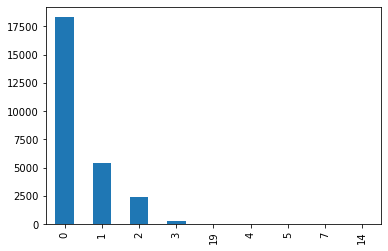

In [577]:
train['child_num'].value_counts(sort=False).plot.bar()

In [578]:
for dataset in train_and_test:
    dataset.loc[dataset['child_num'] != 0, 'child_num'] = 'Children_Yes'
    dataset.loc[dataset['child_num'] == 0, 'child_num'] = 'Children_No'

## - income_total

(array([1.6212e+04, 8.3300e+03, 1.5300e+03, 2.0600e+02, 1.2100e+02,
        4.4000e+01, 3.0000e+00, 2.0000e+00, 4.0000e+00, 5.0000e+00]),
 array([  27000.,  181800.,  336600.,  491400.,  646200.,  801000.,
         955800., 1110600., 1265400., 1420200., 1575000.]),
 <BarContainer object of 10 artists>)

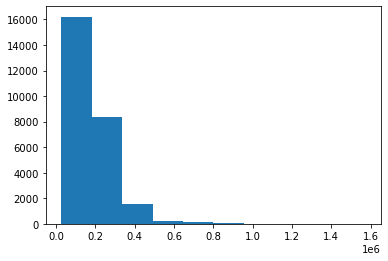

In [579]:
plt.hist(train['income_total'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16740d82128>,
 'caps': [<matplotlib.lines.Line2D at 0x16740d826d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x16740d70e80>],
 'medians': [<matplotlib.lines.Line2D at 0x16740d82c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x16740d82f60>],
 'means': []}

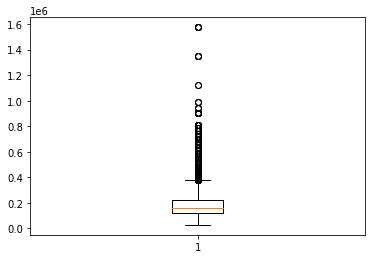

In [580]:
plt.boxplot(train['income_total']) # 이상치가 존재하나 범주형 데이터로 변형할 것이기에 그대로 사용한다.

In [581]:
for dataset in train_and_test:
    Q1 = dataset['income_total'].quantile(0.2)
    Q2 = dataset['income_total'].quantile(0.4)
    Q3 = dataset['income_total'].quantile(0.6)
    Q4 = dataset['income_total'].quantile(0.8)
    Q5 = dataset['income_total'].quantile(1.0)
    bins_income = [0, Q1, Q2, Q3, Q4, Q5]
    labels_income = ['Very_low', 'Low', 'Medium', 'High', 'Very_high']
    cuts = pd.cut(dataset['income_total'], bins = bins_income, labels = labels_income, include_lowest= True)
    dataset['income_total'] = cuts

In [582]:
test

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,Children_No,Very_low,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,Children_No,Low,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,Children_No,Very_low,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,Children_No,Very_low,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,Children_No,High,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,F,Y,Y,Children_No,High,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,Accountants,2.0,-19.0
9996,36453,M,Y,Y,Children_No,High,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,Laborers,2.0,-34.0
9997,36454,F,N,Y,Children_No,Very_high,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,Medicine staff,2.0,-55.0
9998,36455,F,Y,N,Children_No,Medium,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,1,0,1,0,NaN,2.0,-33.0


## - Discrete variables

In [583]:
train['family_size'].value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

(array([1878., 5357.,    0., 1789.,    0.,  846.,  106.,    0.,   14.,
          10.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

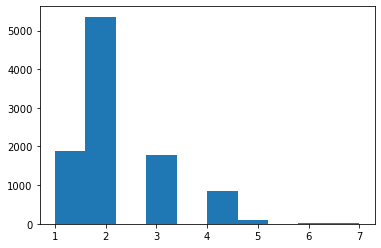

In [584]:
plt.hist(test['family_size'])

In [585]:
test.describe()

,index,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,10000.00000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,31456.50000,-16020.466400,59776.690400,1.0,0.227600,0.296300,0.085600,2.202700,-26.272400
std,2886.89568,4197.672887,138121.224504,0.0,0.419304,0.456648,0.279786,0.898272,16.348557
min,26457.00000,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,28956.75000,-19483.250000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,31456.50000,-15606.000000,-1577.000000,1.0,0.000000,0.000000,0.000000,2.000000,-25.000000
75%,33956.25000,-12539.000000,-410.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,36456.00000,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,7.000000,0.000000


In [586]:
for dataset in train_and_test:
    bins_family = [0, 1, 2, 21]
    labels_family = ['singe', 'double', 'more_than_double']
    cuts = pd.cut(dataset['family_size'], bins = bins_family, labels = labels_family)
    dataset['family_size'] = cuts

In [587]:
train['family_size'].isnull().sum()

0

## - income_type

In [599]:
for dataset in train_and_test:
    dataset.loc[dataset['income_type']=='Student', 'income_type'] = 'Working' # ==> student 데이터의 수가 적고 working 데이터가 크고 다양하다는 점에서 편입함.

## - edu_type

In [602]:
train['edu_type'].value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [605]:
test.groupby(['edu_type', 'income_total'])['income_total'].value_counts() # 확인해본 결과 석박사 과정과 대졸의 소득 분포가 큰 차이를 보이지 않기에 데이터를 합침.

edu_type                       income_total  income_total
Academic degree                Low           Low                2
                               Very_high     Very_high          7
Higher education               Very_low      Very_low         358
                               Low           Low              355
                               Medium        Medium           599
                               High          High             547
                               Very_high     Very_high        843
Incomplete higher              Very_low      Very_low          46
                               Low           Low               79
                               Medium        Medium            94
                               High          High              67
                               Very_high     Very_high        104
Lower secondary                Very_low      Very_low          49
                               Low           Low               21
                  

In [606]:
for dataset in train_and_test:
    dataset.loc[dataset['edu_type']=='Academic degree', 'edu_type'] = 'Higher education'

## - family_type

In [611]:
train['family_type'].value_counts()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

## - house_type

In [620]:
train['house_type'].value_counts()
train['house_type'].unique()

array(['Municipal apartment', 'House / apartment', 'With parents',
       'Co-op apartment', 'Rented apartment', 'Office apartment'],
      dtype=object)

In [617]:
test.groupby(['house_type', 'income_total'])['income_total'].value_counts() # 확인해본 결과 아파트 종류들의 소득 분포가 큰 차이를 보이지 않기에 데이터를 합침.

house_type           income_total  income_total
Co-op apartment      Very_low      Very_low          16
                     Low           Low                6
                     Medium        Medium            13
                     High          High              14
                     Very_high     Very_high          9
House / apartment    Very_low      Very_low        2164
                     Low           Low             1444
                     Medium        Medium          1928
                     High          High            1545
                     Very_high     Very_high       1814
Municipal apartment  Very_low      Very_low          83
                     Low           Low               37
                     Medium        Medium            91
                     High          High              57
                     Very_high     Very_high         42
Office apartment     Very_low      Very_low          11
                     Low           Low                7


In [627]:
for dataset in train_and_test:
    houses = ['Municipal apartment', 'Co-op apartment', 'Rented apartment', 'Office apartment']
    for type in houses:
        dataset.loc[dataset['house_type']==type, 'house_type'] = 'etc_apartment'

In [633]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,Children_No,High,Commercial associate,Higher education,Married,etc_apartment,-13899,-4709,1,0,0,0,NaN,double,-6.0,1.0
1,1,F,N,Y,Children_Yes,High,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,more_than_double,-5.0,1.0
2,2,M,Y,Y,Children_No,Very_high,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,double,-22.0,2.0
3,3,F,N,Y,Children_No,High,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,double,-37.0,0.0
4,4,F,Y,Y,Children_No,Medium,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,double,-26.0,2.0


## - DAYS_EMPLOYED
### 근무일수 데이터 중 양수의 값을 가지는 데이터를 0->Unemployed로 바꾼 후 각 분위에 해당하는 데이터를 'Short', 'Medium', 'Long', 'Very_Long'로 변환함.

In [634]:
# 'DAYS_EMPLOYED' preprocessing
for dataset in train_and_test:
    dataset['DAYS_EMPLOYED'] = dataset['DAYS_EMPLOYED'].replace(365243, 0)
    dataset['DAYS_EMPLOYED'] = dataset['DAYS_EMPLOYED'].abs()

    Q1 = dataset['DAYS_EMPLOYED'].quantile(0.25)
    Q2 = dataset['DAYS_EMPLOYED'].quantile(0.50)
    Q3 = dataset['DAYS_EMPLOYED'].quantile(0.75)

    bins = [0,1, Q1, Q2, Q3, 15713]
    labels = ['Unemployed', 'Short', 'Medium', 'Long', 'Very_Long']
    cuts = pd.cut(dataset['DAYS_EMPLOYED'], bins, right=True, labels=labels, include_lowest= True)
    dataset['DAYS_EMPLOYED'] = cuts


In [635]:
train['DAYS_EMPLOYED'].value_counts()

Medium        6639
Long          6608
Very_Long     6591
Unemployed    4438
Short         2181
Name: DAYS_EMPLOYED, dtype: int64

In [636]:
test['DAYS_EMPLOYED'].isnull().sum()

0

## - DAYS_BIRTH
## 살아온 일수를 절대값을 취한 후 연단위로 바꾸어 반올림함.

In [637]:
for dataset in train_and_test:
    dataset['DAYS_BIRTH'] = (dataset['DAYS_BIRTH']/365).abs().astype(object)
    bins = [20, 30, 40, 50, 60, 70]
    labels = ['20s', '30s', '40s', '50s', '60s']
    cuts = pd.cut(dataset['DAYS_BIRTH'], bins = bins, right=True, labels=labels, include_lowest= True)
    dataset['DAYS_BIRTH'] = cuts
    # pd.get_dummies(dataset['DAYS_BIRTH'])

In [638]:
dataset['DAYS_BIRTH'].value_counts()

30s    2851
40s    2543
50s    2213
20s    1320
60s    1073
Name: DAYS_BIRTH, dtype: int64

In [437]:
train['DAYS_BIRTH'].value_counts()
train['DAYS_BIRTH'].isnull().sum()

0

In [639]:
test['DAYS_BIRTH'].value_counts()
test['DAYS_BIRTH'].isnull().sum()

0

In [640]:
train['DAYS_BIRTH'].value_counts()

30s    7588
40s    6766
50s    5739
20s    3608
60s    2756
Name: DAYS_BIRTH, dtype: int64

In [641]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          26457 non-null  int64   
 1   gender         26457 non-null  object  
 2   car            26457 non-null  object  
 3   reality        26457 non-null  object  
 4   child_num      26457 non-null  object  
 5   income_total   26457 non-null  category
 6   income_type    26457 non-null  object  
 7   edu_type       26457 non-null  object  
 8   family_type    26457 non-null  object  
 9   house_type     26457 non-null  object  
 10  DAYS_BIRTH     26457 non-null  category
 11  DAYS_EMPLOYED  26457 non-null  category
 12  FLAG_MOBIL     26457 non-null  int64   
 13  work_phone     26457 non-null  int64   
 14  phone          26457 non-null  int64   
 15  email          26457 non-null  int64   
 16  occyp_type     18286 non-null  object  
 17  family_size    26457 non-null  

## occupation

In [646]:
train.occyp_type.value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [673]:
train_occyp_null = train.loc[train['occyp_type'].isnull() == True, :]
train_non_response = train_occyp_null.loc[train['DAYS_EMPLOYED']!='Unemployed', 'occyp_type'] # => 직업이 있는 사람 중 응답하지 않은 사람은 non_response로
train_unemployed = train_occyp_null.loc[train['DAYS_EMPLOYED'] == 'Unemployed', 'occyp_type'] # => 직업이 없는 사람 중 응답하지 않은 사람은 no_job으로

In [684]:
train_non_response

0       NaN
8       NaN
19      NaN
20      NaN
23      NaN
         ..
26433   NaN
26435   NaN
26437   NaN
26449   NaN
26453   NaN
Name: occyp_type, Length: 3733, dtype: float64

In [685]:
train_unemployed

14       NaN
18       NaN
21       NaN
24       NaN
46       NaN
        ... 
26431    NaN
26432    NaN
26439    NaN
26441    NaN
26443    NaN
Name: occyp_type, Length: 4438, dtype: object

In [698]:
train.loc[(train['occyp_type'].isnull() == 1) & (train['DAYS_EMPLOYED'] == 'Unemployed') == 1, ['occyp_type']] = train.loc[(train['occyp_type'].isnull() == 1) & (train['DAYS_EMPLOYED'] == 'Unemployed') == 1, ['occyp_type']].fillna('no_job', inplace=True) 
train.loc[(train['occyp_type'].isnull() == 1) & (train['DAYS_EMPLOYED'] != 'Unemployed') == 1, ['occyp_type']] = train.loc[(train['occyp_type'].isnull() == 1) & (train['DAYS_EMPLOYED'] != 'Unemployed') == 1, ['occyp_type']].fillna('non_response', inplace=True) 

In [709]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,Children_No,High,Commercial associate,Higher education,Married,etc_apartment,30s,Very_Long,1,0,0,0,None,double,0_year,1.0
1,1,F,N,Y,Children_Yes,High,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,30s,Long,1,0,0,1,Laborers,more_than_double,0_year,1.0
2,2,M,Y,Y,Children_No,Very_high,Working,Higher education,Married,House / apartment,50s,Very_Long,1,0,1,0,Managers,double,1_year,2.0
3,3,F,N,Y,Children_No,High,Commercial associate,Secondary / secondary special,Married,House / apartment,40s,Long,1,0,1,0,Sales staff,double,3_year,0.0
4,4,F,Y,Y,Children_No,Medium,State servant,Higher education,Married,House / apartment,40s,Long,1,0,0,0,Managers,double,2_year,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,Children_Yes,High,State servant,Secondary / secondary special,Married,House / apartment,30s,Long,1,0,0,0,Core staff,more_than_double,0_year,1.0
26453,26453,F,N,Y,Children_Yes,Medium,Working,Higher education,Separated,House / apartment,40s,Long,1,0,0,0,None,double,3_year,2.0
26454,26454,F,Y,N,Children_No,Very_high,Working,Secondary / secondary special,Civil marriage,With parents,20s,Long,1,0,0,0,Core staff,double,2_year,2.0
26455,26455,M,N,Y,Children_No,Medium,Working,Incomplete higher,Single / not married,House / apartment,20s,Short,1,0,0,0,Laborers,singe,4+_years,2.0


In [642]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,Children_No,High,Commercial associate,Higher education,Married,etc_apartment,30s,Very_Long,1,0,0,0,NaN,double,-6.0,1.0
1,1,F,N,Y,Children_Yes,High,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,30s,Long,1,0,0,1,Laborers,more_than_double,-5.0,1.0
2,2,M,Y,Y,Children_No,Very_high,Working,Higher education,Married,House / apartment,50s,Very_Long,1,0,1,0,Managers,double,-22.0,2.0
3,3,F,N,Y,Children_No,High,Commercial associate,Secondary / secondary special,Married,House / apartment,40s,Long,1,0,1,0,Sales staff,double,-37.0,0.0
4,4,F,Y,Y,Children_No,Medium,State servant,Higher education,Married,House / apartment,40s,Long,1,0,0,0,Managers,double,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,Children_Yes,High,State servant,Secondary / secondary special,Married,House / apartment,30s,Long,1,0,0,0,Core staff,more_than_double,-2.0,1.0
26453,26453,F,N,Y,Children_Yes,Medium,Working,Higher education,Separated,House / apartment,40s,Long,1,0,0,0,NaN,double,-47.0,2.0
26454,26454,F,Y,N,Children_No,Very_high,Working,Secondary / secondary special,Civil marriage,With parents,20s,Long,1,0,0,0,Core staff,double,-25.0,2.0
26455,26455,M,N,Y,Children_No,Medium,Working,Incomplete higher,Single / not married,House / apartment,20s,Short,1,0,0,0,Laborers,singe,-59.0,2.0


## begin_month
### 음수 값을 가진 데이터를 절대값을 취해주었으며, 0의 값을 가진 데이터의 경우 카드를 소지하지 않은 경우로 판단함.

In [443]:
# train['begin_month'].describe()

In [444]:
# train['begin_month'].head()
# train['begin_month'].describe() # 0의 값이 존재함 -> 어떤 의미? -> 카드를 발급받지 아니한 사람 (사유: 다양함 --> 신용불량, 소득 X, 신용등급이 낮은 사회 초년생 등)
# train['begin_month'].isnull().sum() # 결측치 없음
# len(train.loc[train['begin_month'] == 0, :]) # 카드를 소지하지 않은 사람의 수가 231명으로 보임.

In [445]:
# train['begin_month'] = train['begin_month'].abs()/12 # 음수 값을 가지던 데이터에 절대값처리.

In [446]:
# train['begin_month'].value_counts

In [447]:
# bins = [0, 0.001, 1, 2, 3, 4, 5]
# labels = ['NoCard', '0_year', '1_year', '2_year', '3_year', '4+_years']
# cuts = pd.cut(train['begin_month'], bins = bins, right=True, labels=labels, include_lowest= True)
# train['begin_month'] = cuts
# train['begin_month'].value_counts()


In [643]:
for dataset in train_and_test:
    dataset['begin_month'] = dataset['begin_month'].abs()/12
    bins = [0, 0.001, 1, 2, 3, 4, 5]
    labels = ['NoCard', '0_year', '1_year', '2_year', '3_year', '4+_years']
    cuts = pd.cut(dataset['begin_month'], bins = bins, right=True, labels=labels, include_lowest= True)
    dataset['begin_month'] = cuts

In [644]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          26457 non-null  int64   
 1   gender         26457 non-null  object  
 2   car            26457 non-null  object  
 3   reality        26457 non-null  object  
 4   child_num      26457 non-null  object  
 5   income_total   26457 non-null  category
 6   income_type    26457 non-null  object  
 7   edu_type       26457 non-null  object  
 8   family_type    26457 non-null  object  
 9   house_type     26457 non-null  object  
 10  DAYS_BIRTH     26457 non-null  category
 11  DAYS_EMPLOYED  26457 non-null  category
 12  FLAG_MOBIL     26457 non-null  int64   
 13  work_phone     26457 non-null  int64   
 14  phone          26457 non-null  int64   
 15  email          26457 non-null  int64   
 16  occyp_type     18286 non-null  object  
 17  family_size    26457 non-null  

## one_hot  encoding

In [450]:
# print(number)

In [451]:
train_x = train.drop('credit', axis = 1)
train_y = train[['credit']]
test_x = test

In [452]:
train_x = pd.get_dummies(train_x, drop_first= True)
test_x = pd.get_dummies(test_x, drop_first= True)

In [453]:
test_x

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_BIRTH_60s,DAYS_EMPLOYED_Short,DAYS_EMPLOYED_Medium,DAYS_EMPLOYED_Long,DAYS_EMPLOYED_Very_Long,begin_month_0_year,begin_month_1_year,begin_month_2_year,begin_month_3_year,begin_month_4+_years
0,26457,1,1,0,0,0,1,4,0,1,...,1,0,0,0,0,0,0,0,0,1
1,26458,0,0,1,0,0,2,1,1,1,...,0,0,0,0,1,0,0,1,0,0
2,26459,0,0,1,0,0,4,4,1,1,...,0,1,0,0,0,0,0,0,1,0
3,26460,1,1,0,0,0,0,4,1,1,...,0,0,0,1,0,0,0,0,1,0
4,26461,0,1,1,0,0,2,1,1,1,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,0,4,2,1,1,...,0,0,0,0,1,0,1,0,0,0
9996,36453,1,1,1,0,0,4,4,0,1,...,0,0,1,0,0,0,0,1,0,0
9997,36454,0,0,1,0,1,4,4,1,1,...,0,0,0,0,1,0,0,0,0,1
9998,36455,0,1,0,0,0,0,4,1,1,...,0,0,1,0,0,0,0,1,0,0


In [454]:
print(train.shape)
print(test.shape)

(26457, 19)
(10000, 18)


In [455]:
train.info

<bound method DataFrame.info of        index  gender  car  reality  child_num  income_total  income_type  \
0          0       0    0        0          0             0            0   
1          1       0    0        1          1             0            0   
2          2       1    1        1          0             1            4   
3          3       0    0        1          0             0            0   
4          4       0    1        1          0             0            2   
...      ...     ...  ...      ...        ...           ...          ...   
26452  26452       0    0        0          2             0            2   
26453  26453       0    0        1          1             0            4   
26454  26454       0    1        0          0             1            4   
26455  26455       1    0        1          0             0            4   
26456  26456       0    0        0          0             0            4   

       edu_type  family_type  house_type DAYS_BIRTH DAY

# [데이터 모델링]

In [456]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          26457 non-null  int64   
 1   gender         26457 non-null  int64   
 2   car            26457 non-null  int64   
 3   reality        26457 non-null  int64   
 4   child_num      26457 non-null  int64   
 5   income_total   26457 non-null  int32   
 6   income_type    26457 non-null  int32   
 7   edu_type       26457 non-null  int32   
 8   family_type    26457 non-null  int32   
 9   house_type     26457 non-null  int32   
 10  DAYS_BIRTH     26457 non-null  category
 11  DAYS_EMPLOYED  26457 non-null  category
 12  FLAG_MOBIL     26457 non-null  int64   
 13  work_phone     26457 non-null  int64   
 14  phone          26457 non-null  int64   
 15  email          26457 non-null  int64   
 16  family_size    26457 non-null  float64 
 17  begin_month    26457 non-null  

In [457]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          10000 non-null  int64   
 1   gender         10000 non-null  int64   
 2   car            10000 non-null  int64   
 3   reality        10000 non-null  int64   
 4   child_num      10000 non-null  int64   
 5   income_total   10000 non-null  int32   
 6   income_type    10000 non-null  int32   
 7   edu_type       10000 non-null  int32   
 8   family_type    10000 non-null  int32   
 9   house_type     10000 non-null  int32   
 10  DAYS_BIRTH     10000 non-null  category
 11  DAYS_EMPLOYED  10000 non-null  category
 12  FLAG_MOBIL     10000 non-null  int64   
 13  work_phone     10000 non-null  int64   
 14  phone          10000 non-null  int64   
 15  email          10000 non-null  int64   
 16  family_size    10000 non-null  float64 
 17  begin_month    10000 non-null  c

In [458]:
print(train_x.shape, test_x.shape, train_y.shape)

(26457, 28) (10000, 28) (26457, 1)


In [459]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)

Train set: 
(19842, 28)
(19842, 1)
Validation set: 
(6615, 28)
(6615, 1)


In [460]:
# rf_clf=RandomForestClassifier()
# rf_clf.fit(X_train, y_train)
# y_pred_rf=rf_clf.predict_proba(X_val)

# print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred_rf)}")

In [461]:
# gbm_clf=GradientBoostingClassifier()
# gbm_clf.fit(X_train, y_train)
# y_pred_gbm=gbm_clf.predict_proba(X_val)

# print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred_gbm)}")

In [462]:
# ada_clf=AdaBoostClassifier()
# ada_clf.fit(X_train, y_train)
# y_pred_ada=ada_clf.predict_proba(X_val)

# print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred_ada)}")

In [469]:
cbt_clf = CatBoostClassifier()
cbt_clf.fit(X_train, y_train)
y_pred_cbt = cbt_clf.predict_proba(X_val)


print("훈련 세트 정확도: {:.3f}".format(cbt_clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(cbt_clf.score(X_val, y_val)))

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred_cbt)}")

Learning rate set to 0.092151
0:	learn: 1.0563075	total: 33.9ms	remaining: 33.9s
1:	learn: 1.0224167	total: 96.9ms	remaining: 48.3s
2:	learn: 0.9951641	total: 116ms	remaining: 38.6s
3:	learn: 0.9728319	total: 132ms	remaining: 32.8s
4:	learn: 0.9545204	total: 147ms	remaining: 29.2s
5:	learn: 0.9392265	total: 162ms	remaining: 26.8s
6:	learn: 0.9265061	total: 177ms	remaining: 25.1s
7:	learn: 0.9157857	total: 200ms	remaining: 24.9s
8:	learn: 0.9069737	total: 226ms	remaining: 24.9s
9:	learn: 0.8995508	total: 253ms	remaining: 25.1s
10:	learn: 0.8932515	total: 286ms	remaining: 25.7s
11:	learn: 0.8882554	total: 331ms	remaining: 27.2s
12:	learn: 0.8835181	total: 349ms	remaining: 26.5s
13:	learn: 0.8796049	total: 373ms	remaining: 26.2s
14:	learn: 0.8767616	total: 390ms	remaining: 25.6s
15:	learn: 0.8737688	total: 407ms	remaining: 25s
16:	learn: 0.8712409	total: 430ms	remaining: 24.9s
17:	learn: 0.8692249	total: 448ms	remaining: 24.4s
18:	learn: 0.8672045	total: 468ms	remaining: 24.2s
19:	learn: 

In [ ]:
len(train.columns)

19

In [ ]:
len(train.columns)

19

In [470]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(cbt_clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        cbt_clf.fit(X_train, y_train)
        
        predictions=cbt_clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=cbt_clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(cbt_clf)

Learning rate set to 0.092455
0:	learn: 1.0559498	total: 27.8ms	remaining: 27.7s
1:	learn: 1.0217154	total: 44ms	remaining: 22s
2:	learn: 0.9943659	total: 60.5ms	remaining: 20.1s
3:	learn: 0.9719884	total: 75.4ms	remaining: 18.8s
4:	learn: 0.9536319	total: 90.6ms	remaining: 18s
5:	learn: 0.9383196	total: 108ms	remaining: 17.9s
6:	learn: 0.9255134	total: 123ms	remaining: 17.5s
7:	learn: 0.9148155	total: 141ms	remaining: 17.4s
8:	learn: 0.9059847	total: 169ms	remaining: 18.6s
9:	learn: 0.8990369	total: 182ms	remaining: 18s
10:	learn: 0.8926930	total: 199ms	remaining: 17.9s
11:	learn: 0.8872969	total: 224ms	remaining: 18.4s
12:	learn: 0.8826137	total: 248ms	remaining: 18.8s
13:	learn: 0.8786863	total: 290ms	remaining: 20.4s
14:	learn: 0.8758626	total: 305ms	remaining: 20.1s
15:	learn: 0.8729424	total: 332ms	remaining: 20.4s
16:	learn: 0.8702412	total: 368ms	remaining: 21.3s
17:	learn: 0.8681737	total: 386ms	remaining: 21.1s
18:	learn: 0.8662573	total: 407ms	remaining: 21s
19:	learn: 0.864

In [471]:
my_submission

array([[0.04441267, 0.06963575, 0.88595157],
       [0.04751892, 0.09908392, 0.85339716],
       [0.03668857, 0.14046913, 0.8228423 ],
       ...,
       [0.01611899, 0.06689033, 0.91699068],
       [0.11254799, 0.35225174, 0.53520026],
       [0.04735866, 0.34988007, 0.60276128]])

In [472]:
submission

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


In [467]:
my_submission.shape

(26457, 3)

In [473]:
submission.loc[:, 1:] = my_submission

In [ ]:
submission

,index,0,1,2
0,26457,0.045728,0.151175,0.803098
1,26458,0.039768,0.173646,0.786586
2,26459,0.033007,0.226158,0.740835
3,26460,0.230972,0.140486,0.628542
4,26461,0.048883,0.203437,0.747680
...,...,...,...,...
9995,36452,0.043620,0.235427,0.720953
9996,36453,0.042847,0.234898,0.722255
9997,36454,0.074602,0.288197,0.637200
9998,36455,0.206676,0.100667,0.692657


In [474]:
submission.to_csv(r'C:\Users\kwctl\Desktop\CreditCard\Ubion-CreditCardUserPrediction\Data\submission_JH_cbt1.csv', index=False)